# ***Penguin Classification Analysis***

1. Download the dataset
2. Load the dataset into the tool.
3. Perform Below Visualizations.

   ● Univariate Analysis

   ● Bi- Variate Analysis

   ● Multi-Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Check for Missing values and deal with them.
6. Find the outliers and replace them outliers
7. Check for Categorical columns and perform encoding.
9. Split the data into dependent and independent variables.
10. Scaling the data
11. Split the data into training and testing
12. Build the Model
13. Train the Model
14. Test the Model
15. Measure the performance using Evaluation Metrics.

## **1. Download dataset and import libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #simple data visualization
%matplotlib inline
import seaborn as sns #some advanced data visualizations
import warnings
warnings.filterwarnings('ignore') # to get rid of warnings
plt.style.use('seaborn-white') #defining desired style of viz

## **2. Load the dataset into the tool**

In [ ]:
df = pd.read_csv("/content/penguins_size.csv")

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


**Basic Info**

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df.shape

(344, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

## **3. Perform Visualizations**

### **Univariate analysis**

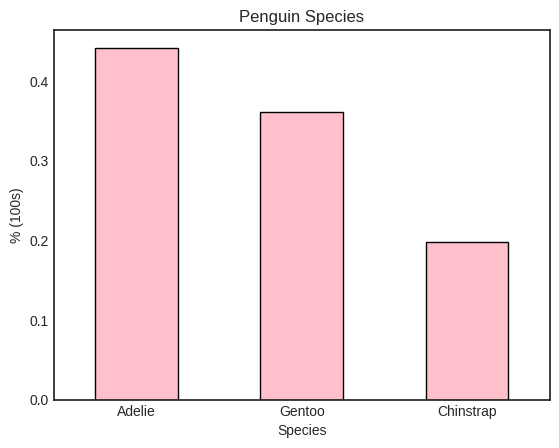

In [ ]:
df['species'].value_counts(normalize = True).plot(kind = 'bar',color= "pink",linewidth = 1, edgecolor = 'k')
plt.title('Penguin Species')
plt.xlabel('Species')
plt.ylabel('% (100s)')
plt.xticks(rotation = 360)
plt.show()

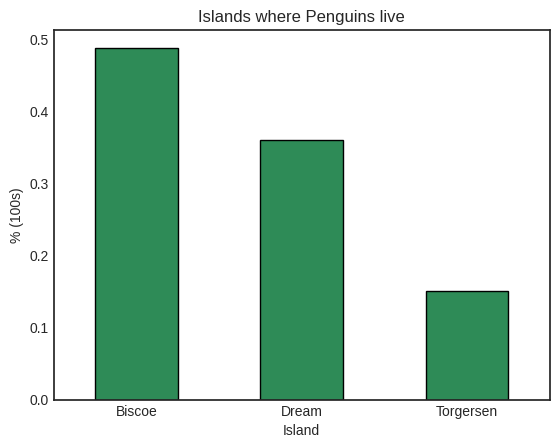

In [ ]:
df['island'].value_counts(normalize = True).plot(kind = 'bar', color = 'seagreen', linewidth = 1, edgecolor = 'k')
plt.title('Islands where Penguins live')
plt.xlabel('Island')
plt.ylabel('% (100s)')
plt.xticks(rotation = 360)
plt.show()

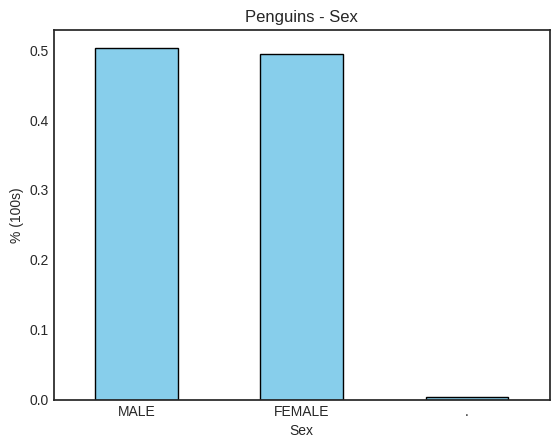

In [ ]:
df['sex'].value_counts(normalize = True).plot(kind = 'bar', color = 'skyblue', linewidth = 1, edgecolor = 'k')
plt.title('Penguins - Sex')
plt.xlabel('Sex')
plt.ylabel('% (100s)')
plt.xticks(rotation = 360)
plt.show()

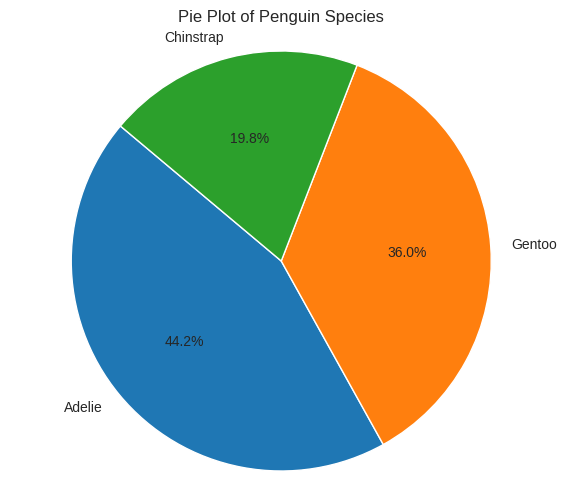

In [ ]:
species_counts = df['species'].value_counts()
plt.figure(figsize=(7, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Plot of Penguin Species')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

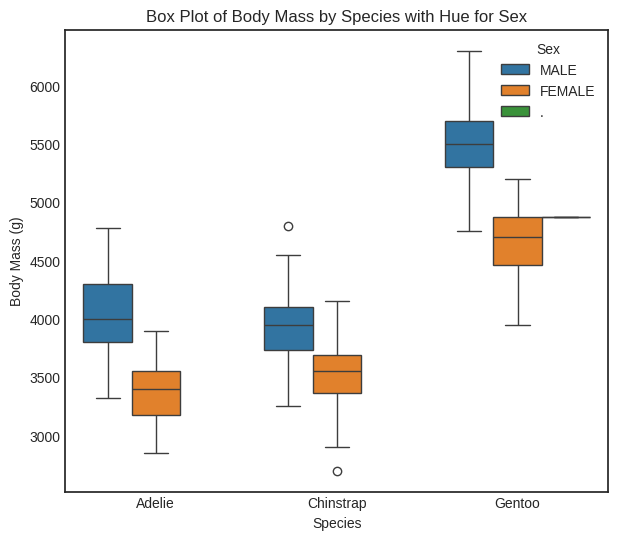

In [ ]:
plt.figure(figsize=(7, 6))
sns.boxplot(x='species', y='body_mass_g', hue='sex', data=df)
plt.title('Box Plot of Body Mass by Species with Hue for Sex')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.legend(title='Sex')
plt.show()

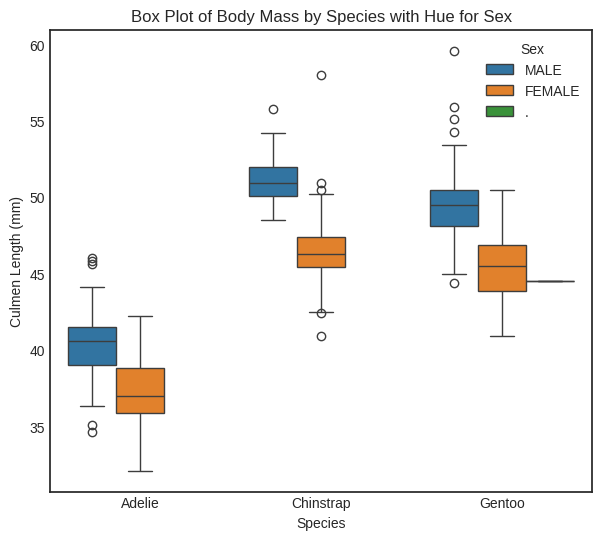

In [ ]:
plt.figure(figsize=(7, 6))
sns.boxplot(x='species', y='culmen_length_mm', hue='sex', data=df)
plt.title('Box Plot of Body Mass by Species with Hue for Sex')
plt.xlabel('Species')
plt.ylabel('Culmen Length (mm)')
plt.legend(title='Sex')
plt.show()

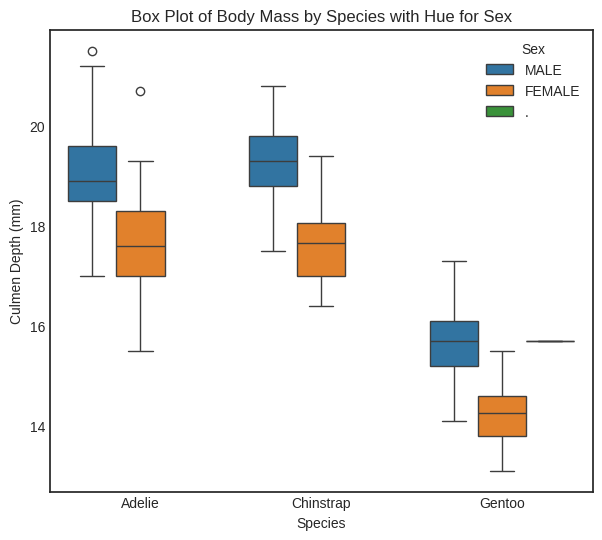

In [ ]:
plt.figure(figsize=(7, 6))
sns.boxplot(x='species', y='culmen_depth_mm', hue='sex', data=df)
plt.title('Box Plot of Body Mass by Species with Hue for Sex')
plt.xlabel('Species')
plt.ylabel('Culmen Depth (mm)')
plt.legend(title='Sex')
plt.show()

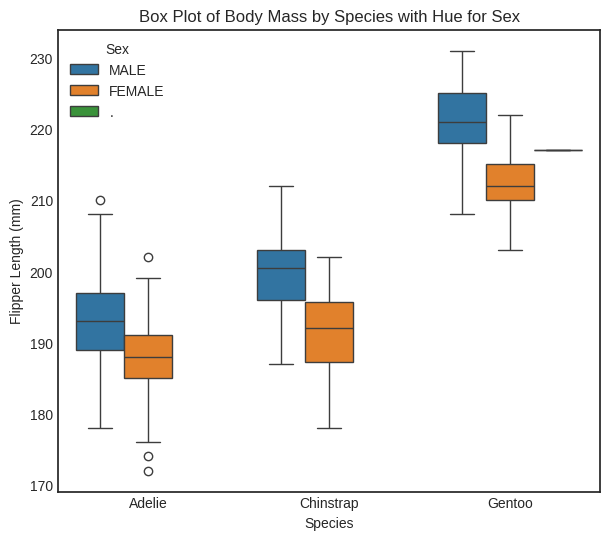

In [ ]:
plt.figure(figsize=(7, 6))
sns.boxplot(x='species', y='flipper_length_mm', hue='sex', data=df)
plt.title('Box Plot of Body Mass by Species with Hue for Sex')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Sex')
plt.show()

### **Bivariate Analysis**

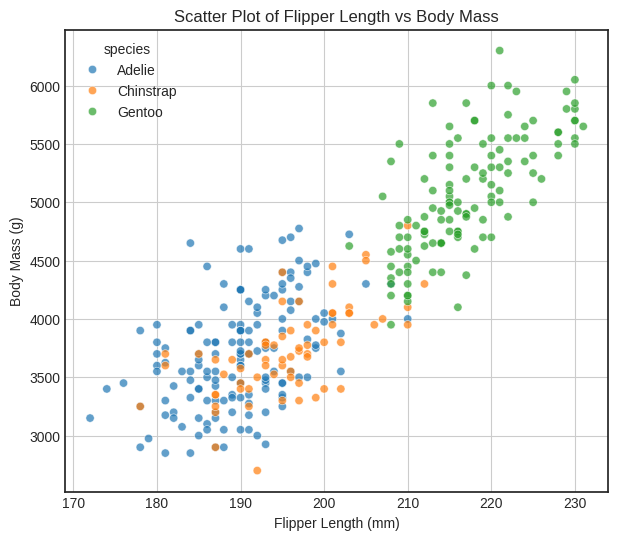

In [ ]:
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species', alpha=0.7)
plt.title('Scatter Plot of Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid(True)
plt.show()

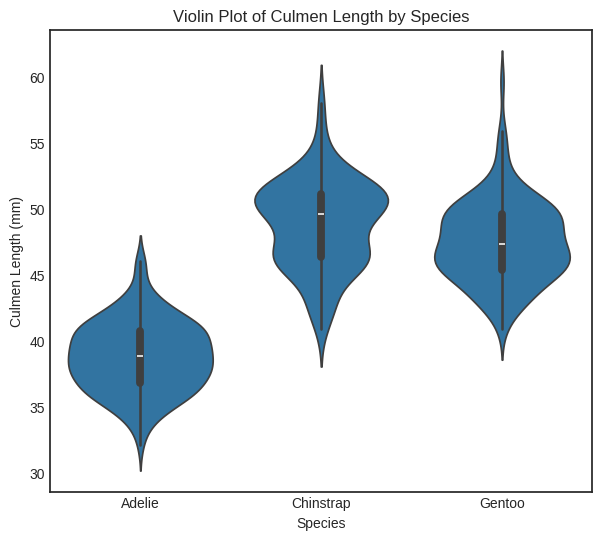

In [ ]:
plt.figure(figsize=(7, 6))
sns.violinplot(x='species', y='culmen_length_mm', data=df)
plt.title('Violin Plot of Culmen Length by Species')
plt.xlabel('Species')
plt.ylabel('Culmen Length (mm)')
plt.show()

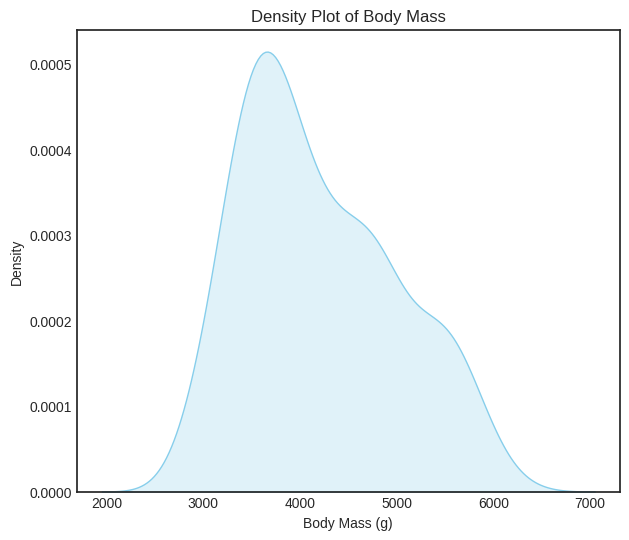

In [ ]:
plt.figure(figsize=(7, 6))
sns.kdeplot(data=df['body_mass_g'], shade=True, color='skyblue')
plt.title('Density Plot of Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Density')
plt.show()

<Axes: xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

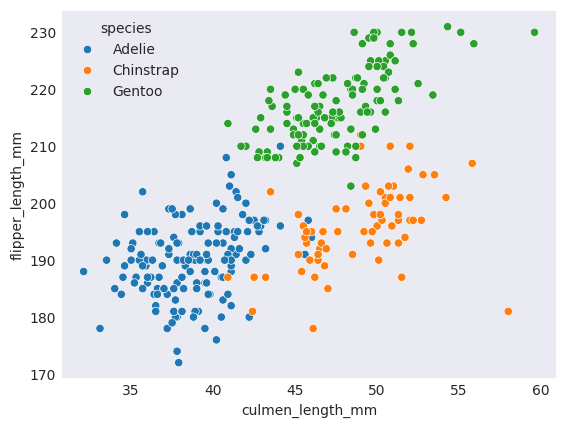

In [ ]:
sns.set_style('dark')
sns.scatterplot(x=df.culmen_length_mm,y=df.flipper_length_mm,hue=df.species)

### **Multivariate Analysis**

<Figure size 400x300 with 0 Axes>

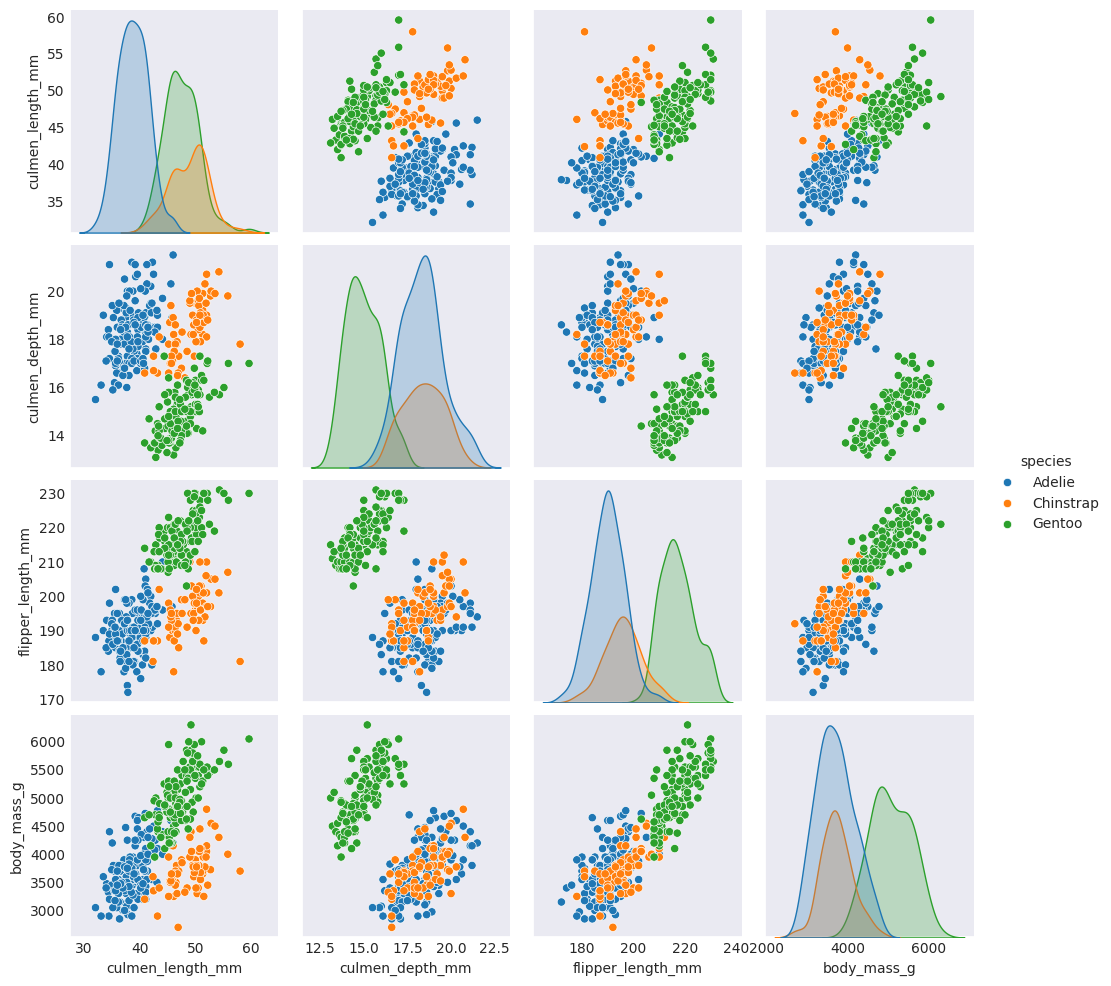

In [ ]:
plt.figure(figsize=(4, 3))
sns.pairplot(df, hue = 'species')
plt.show()

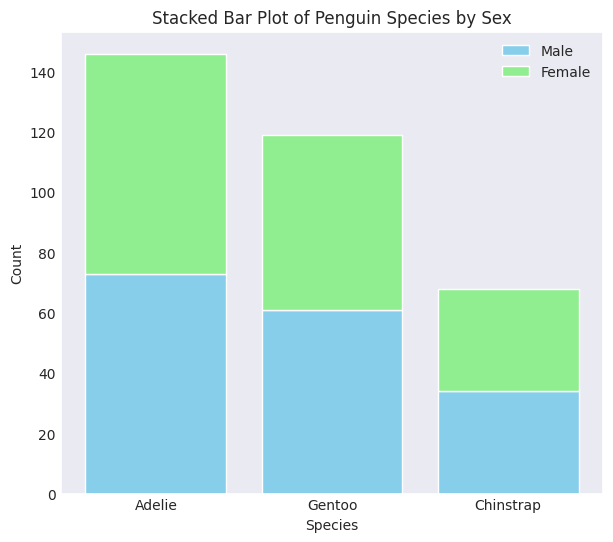

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'species' is a categorical column and 'body_mass_g' is a numerical column in your DataFrame
species_counts = df['species'].value_counts()
male_counts = df[df['sex'] == 'MALE']['species'].value_counts()
female_counts = df[df['sex'] == 'FEMALE']['species'].value_counts()

# Create stacked bar plot
plt.figure(figsize=(7, 6))
plt.bar(species_counts.index, male_counts, label='Male', color='skyblue')
plt.bar(species_counts.index, female_counts, bottom=male_counts, label='Female', color='lightgreen')
plt.title('Stacked Bar Plot of Penguin Species by Sex')
plt.xlabel('Species')
plt.ylabel('Count')
plt.legend()
plt.show()

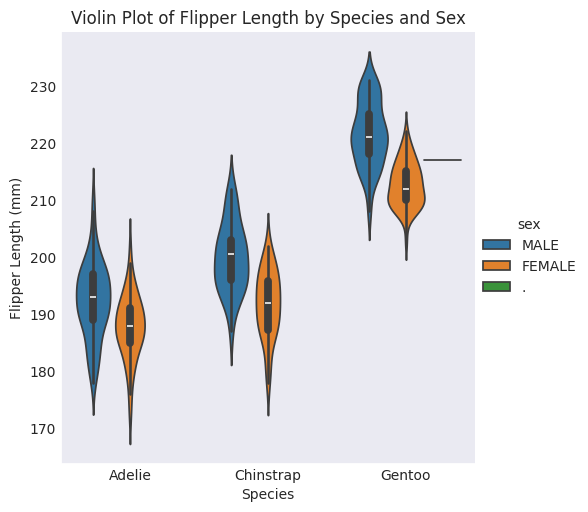

In [ ]:
sns.catplot(x='species', y='flipper_length_mm', hue='sex', kind='violin', data=df)
plt.title('Violin Plot of Flipper Length by Species and Sex')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.show()

## **4. Descriptive Statistics**

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df.groupby('species')['body_mass_g'].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

In [ ]:
df.groupby('species').agg({'body_mass_g': ['mean', 'median', 'std']})

body_mass_g                    
                  mean  median         std
species                                   
Adelie     3700.662252  3700.0  458.566126
Chinstrap  3733.088235  3700.0  384.335081
Gentoo     5076.016260  5000.0  504.116237

In [ ]:
pivot_table_result = pd.pivot_table(df,
                                    values=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'],
                                    index=['species'],
                                    aggfunc='mean')

pivot_table_result.round(1)

,body_mass_g,culmen_depth_mm,culmen_length_mm,flipper_length_mm
species,,,,
Adelie,3700.7,18.3,38.8,190.0
Chinstrap,3733.1,18.4,48.8,195.8
Gentoo,5076.0,15.0,47.5,217.2


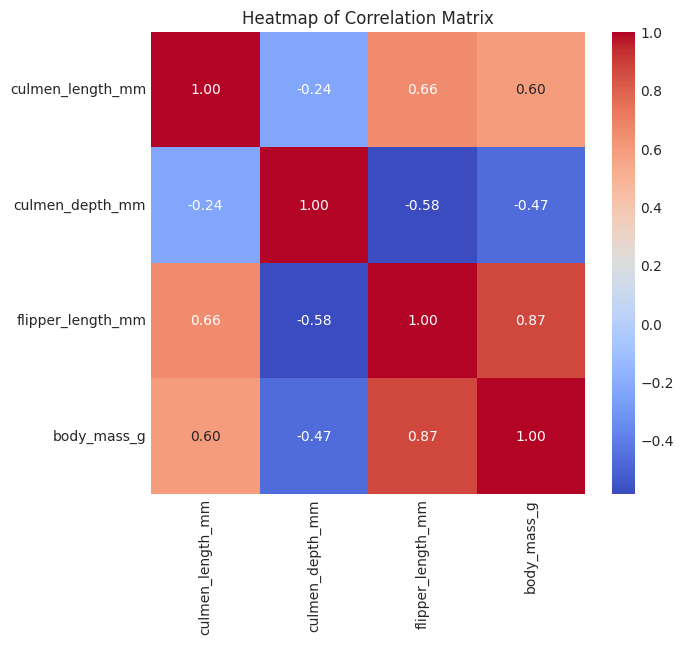

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(7, 6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

## **5. Check for Missing values and deal with them.**

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean().round(1), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean().round(1), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean().round(0), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean().round(0), inplace=True)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## **6. Find the outliers and replace them outliers**

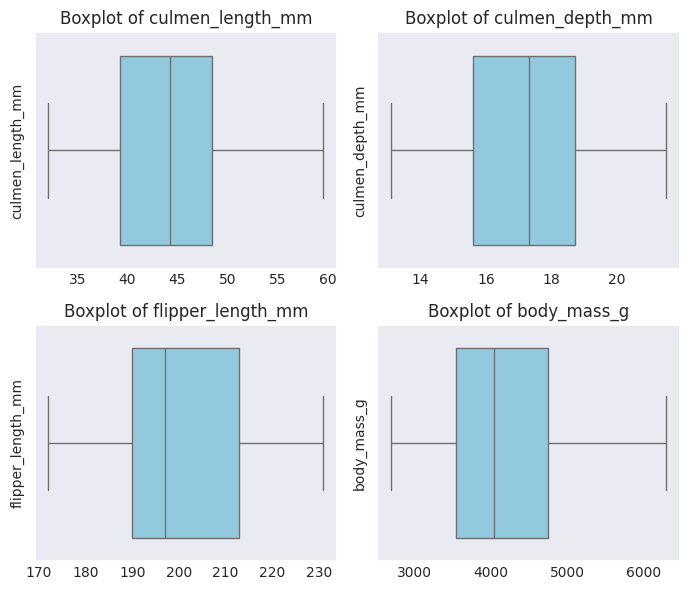

In [ ]:
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create boxplots with outliers highlighted
plt.figure(figsize=(7, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], color='skyblue')
    #plt.scatter(outliers.index, outliers[column], color='red', label='Outliers')
    plt.title(f'Boxplot of {column}')
    plt.xlabel('')
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()

## **7. Check for Categorical columns and perform encoding.**

In [ ]:
df.head(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
# Print the list of categorical columns
print("Categorical Columns: ", list(categorical_columns))

Categorical Columns:  ['species', 'island', 'sex']


In [ ]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['species']=le.fit_transform(df['species'])
df['island']=le.fit_transform(df['island'])
df['sex']=le.fit_transform(df['sex'])

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
3,0,2,43.9,17.2,201.0,4202.0,2
4,0,2,36.7,19.3,193.0,3450.0,1


## **8. Split the data into dependent and independent variables.**

In [ ]:
x=df.drop('species',axis=1)
y=df['species']

In [ ]:
x.head(2)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,2
1,2,39.5,17.4,186.0,3800.0,1


In [ ]:
y.head(2)

0    0
1    0
Name: species, dtype: int64

## **9. Scaling the data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [ ]:
x = mms.fit_transform(x)

In [ ]:
x

array([[1.        , 0.25454545, 0.66666667, 0.15254237, 0.29166667,
        1.        ],
       [1.        , 0.26909091, 0.51190476, 0.23728814, 0.30555556,
        0.5       ],
       [1.        , 0.29818182, 0.58333333, 0.38983051, 0.15277778,
        0.5       ],
       ...,
       [0.        , 0.66545455, 0.30952381, 0.84745763, 0.84722222,
        1.        ],
       [0.        , 0.47636364, 0.20238095, 0.6779661 , 0.69444444,
        0.5       ],
       [0.        , 0.64727273, 0.35714286, 0.69491525, 0.75      ,
        1.        ]])

## **10. Split the data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

## **11. Build the Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
lr = LogisticRegression(solver='liblinear', random_state=0)
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', random_state=0)

## **12. Train the Model**

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
svm.fit(x_train, y_train)

SVC(random_state=0)

In [ ]:
pred_lr = lr.predict(x_test)
pred_dt = dt.predict(x_test)
pred_rf = rf.predict(x_test)
pred_knn = knn.predict(x_test)
pred_svm = svm.predict(x_test)

## **13. Test the Model**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_test,pred_lr)

0.9855072463768116

In [ ]:
accuracy_score(y_test,pred_dt)

0.9855072463768116

In [ ]:
accuracy_score(y_test,pred_rf)

1.0

In [ ]:
accuracy_score(y_test,pred_knn)

0.9855072463768116

In [ ]:
accuracy_score(y_test,pred_svm)

0.9855072463768116

## **14. Measure the performance using Evaluation Metrics.**

In [ ]:
print("Logistic Regression Report:\n", classification_report(y_test,pred_lr))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.99      0.97      0.98        69
weighted avg       0.99      0.99      0.99        69



In [ ]:
print("Decision Tree Report:\n", classification_report(y_test,pred_dt))

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.99      0.97      0.98        69
weighted avg       0.99      0.99      0.99        69



In [ ]:
print("Random Forest Report:\n", classification_report(y_test,pred_rf))

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [ ]:
print("KNN Report:\n", classification_report(y_test,pred_knn))

KNN Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



In [ ]:
print("SVM Report:\n", classification_report(y_test,pred_svm))

SVM Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

